In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-classification-finetuning/sample_submission.csv
/kaggle/input/llm-classification-finetuning/train.csv
/kaggle/input/llm-classification-finetuning/test.csv


In [3]:
train_df=pd.read_csv('/kaggle/input/llm-classification-finetuning/train.csv')
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB
None


In [5]:
train_df['winner_model_a'].value_counts()

winner_model_a
0    37413
1    20064
Name: count, dtype: int64

In [6]:
train_df['winner_model_b'].value_counts()

winner_model_b
0    37825
1    19652
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des types de données')

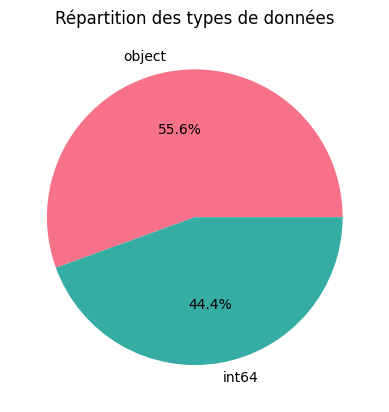

In [7]:
#Visualisations
fig,axes=plt.subplots()
data_types=train_df.dtypes.value_counts()
colors=sns.color_palette('husl',len(data_types))
axes.pie(data_types.values, labels=data_types.index, autopct='%1.1f%%', colors=colors)
axes.set_title('Répartition des types de données')

In [8]:
#Analyse des colonnes contextuelles 
print("Exemple de prompt: ")
print(train_df['prompt'].iloc[0])
print("\nExemple de response_a:")
print(train_df['response_a'].iloc[0])

Exemple de prompt: 
["Is it morally right to try to have a certain percentage of females on managerial positions?","OK, does pineapple belong on a pizza? Relax and give me fun answer."]

Exemple de response_a:
["The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.\n\nHere are some arguments in favor of and against such policies:\n\n**Arguments in favor:**\n\n1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.\n\n2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and soci

In [9]:
#Analyse des modèles

print("Modèle A les plus fréquents")
print(train_df['model_a'].value_counts().head(10))
print("\nModèle B les plus fréquents ")
print(train_df["model_b"].value_counts().head(10))

Modèle A les plus fréquents
model_a
gpt-4-1106-preview            3678
gpt-3.5-turbo-0613            3553
gpt-4-0613                    3099
claude-2.1                    2859
gpt-4-0314                    2087
claude-instant-1              2085
claude-1                      1955
vicuna-33b                    1843
mixtral-8x7b-instruct-v0.1    1741
mistral-medium                1706
Name: count, dtype: int64

Modèle B les plus fréquents 
model_b
gpt-4-1106-preview            3709
gpt-3.5-turbo-0613            3530
gpt-4-0613                    3066
claude-2.1                    2724
claude-instant-1              2051
gpt-4-0314                    2035
claude-1                      2023
vicuna-33b                    1877
mixtral-8x7b-instruct-v0.1    1804
llama-2-70b-chat              1753
Name: count, dtype: int64


In [10]:
#Longueur de réponses

train_df['len_prompt']=train_df['prompt'].str.len()
train_df['len_response_a']=train_df['response_a'].str.len()
train_df['len_response_b']=train_df['response_b'].str.len()

print(train_df[['len_prompt','len_response_a','len_response_b']].describe())

         len_prompt  len_response_a  len_response_b
count  57477.000000    57477.000000    57477.000000
mean     369.198584     1377.818919     1386.162169
std     1073.341472     1513.932333     1537.800488
min        7.000000        4.000000        4.000000
25%       52.000000      408.000000      413.000000
50%       96.000000     1076.000000     1086.000000
75%      243.000000     1862.000000     1873.000000
max    33056.000000    54058.000000    53830.000000


In [11]:
#Distribution des winners

winners= pd.DataFrame({
    'Model A': train_df['winner_model_a'].sum(),
    'Model B': train_df['winner_model_b'].sum(),
    'Tie': train_df['winner_tie'].sum()
},index=[0])

print("Vérification des winners par ligne:")
print((train_df['winner_model_a'] + train_df['winner_model_b'] + train_df['winner_tie']).value_counts())

Vérification des winners par ligne:
1    57477
Name: count, dtype: int64


In [12]:
#Corrélation longueur vs préférence

avg_len_a_wins=train_df[train_df['winner_model_a']==1]['len_response_a'].mean()
avg_len_b_wins=train_df[train_df['winner_model_b']==1]['len_response_b'].mean()

print('Longueur moyenne des réponses gagnantes:')
print(f"Model A : {avg_len_a_wins:.0f}")
print(f"Model B : {avg_len_b_wins: .0f}")

Longueur moyenne des réponses gagnantes:
Model A : 1568
Model B :  1569


In [13]:
#Performance par modèle 
model_performance={}
for model in train_df['model_a'].unique():
    wins_as_a=train_df[(train_df['model_a']==model) & (train_df['winner_model_a']==1)].shape[0]
    wins_as_b=train_df[(train_df['model_b']==model) & (train_df['winner_model_b']==1)].shape[0]
    total_as_a=train_df[train_df['model_a']==model].shape[0]
    total_as_b=train_df[train_df['model_b']==model].shape[0]
    win_rate=(wins_as_a + wins_as_b)/(total_as_a + total_as_b)
    model_performance[model]=win_rate
top_models= sorted(model_performance.items(), key= lambda x:x[1], reverse=True)[:10]
print(top_models)

[('gpt-4-1106-preview', 0.5513740354677136), ('gpt-3.5-turbo-0314', 0.5460829493087558), ('gpt-4-0125-preview', 0.5137931034482759), ('gpt-4-0314', 0.4835031538088307), ('claude-1', 0.43916540975364504), ('gpt-4-0613', 0.39740470397404704), ('claude-instant-1', 0.3970019342359768), ('qwen1.5-72b-chat', 0.39019963702359345), ('claude-2.0', 0.38925081433224756), ('llama-2-70b-chat', 0.3725204200700117)]
